# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
!pip install palmerpenguins
from palmerpenguins import load_penguins

In [2]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
# Dropping NA values
penguins = penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm'])

In [4]:
# Convert 'year' column to object
penguins['year'] = penguins['year'].astype('object')

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [5]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [6]:
# Creating response and predictor variables
X = penguins.drop('bill_depth_mm', axis=1)
y = penguins['bill_depth_mm']

# Initializing the column transformer
ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'), make_column_selector(dtype_include=object)),
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
)

In [7]:
# Defining the pipelines for each model
lr_pipeline = Pipeline([
    ('transformer', ct),
    ('model', LinearRegression())
])

knn_pipeline_1 = Pipeline([
    ('transformer', ct),
    ('model', KNeighborsRegressor(n_neighbors=5))
])

knn_pipeline_2 = Pipeline([
    ('transformer', ct),
    ('model', KNeighborsRegressor(n_neighbors=10))
])

dec_tree_pipeline = Pipeline([
    ('transformer', ct),
    ('model', DecisionTreeRegressor())
])

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fitting and creating train test errors and predictions
pipelines = [lr_pipeline, knn_pipeline_1, knn_pipeline_2, dec_tree_pipeline]
pipeline_names = ['Linear', 'KNN (k=5)', 'KNN (k=10)', 'Decision Tree']
train_errors = []
test_errors = []

# Iterating over the pipelines
for pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    train_pred = pipeline.predict(X_train)
    test_pred = pipeline.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_pred))
    test_errors.append(mean_squared_error(y_test, test_pred))

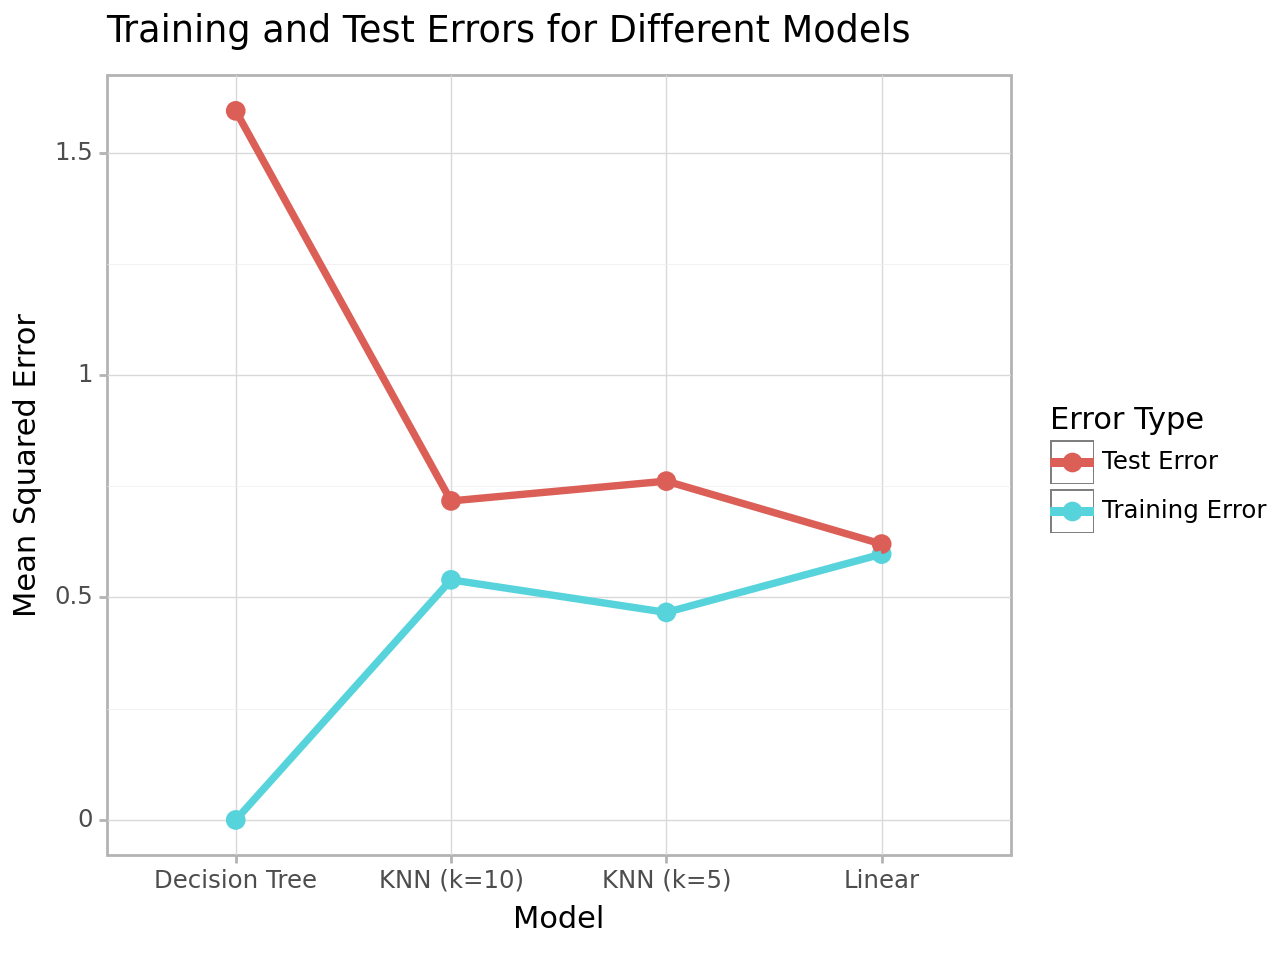

In [8]:
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_light

# Preparing the data for plotting
error_data = pd.DataFrame({
    'Model': pipeline_names * 2,
    'Error Type': ['Training Error'] * 4 + ['Test Error'] * 4, # Times 4 for the 4 models
    'Error': train_errors + test_errors
})

# Plotting
plot = (ggplot(error_data, aes(x='Model', y='Error', color='Error Type', group='Error Type')) +
        geom_point(size=3) +
        geom_line(size=1.5) +
        labs(title='Training and Test Errors for Different Models', y='Mean Squared Error') +
        theme_light()
       )

print(plot)

*    From the plot, we can see that the Elastic Net Model has significantly higher test errors than the other non-parametric models.
*    The linear model had the lowest training error, and a lower MSE than the KNN Models. The gap between test and train was also small, similar to the KNN k=10 Model.
*    The two KNN models with k values of 5 and 10, had similar MSE. The k=10 KNN model's test and train MSE were closer together than the k=5 KNN model.
*    The Linear model had the lowest test error, therefore it is best performing.

Trying KNN k=25 and k=75

In [15]:
knn_pipeline_1 = Pipeline([
    ('transformer', ct),
    ('model', KNeighborsRegressor(n_neighbors=25))
])

knn_pipeline_2 = Pipeline([
    ('transformer', ct),
    ('model', KNeighborsRegressor(n_neighbors=75))
])

# Fitting and creating train test errors and predictions
pipelines = [lr_pipeline, knn_pipeline_1, knn_pipeline_2, dec_tree_pipeline]
pipeline_names = ['Linear', 'KNN (k=25)', 'KNN (k=75)', 'Decision Tree']
train_errors = []
test_errors = []

# Iterating over the pipelines
for pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    train_pred = pipeline.predict(X_train)
    test_pred = pipeline.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_pred))
    test_errors.append(mean_squared_error(y_test, test_pred))

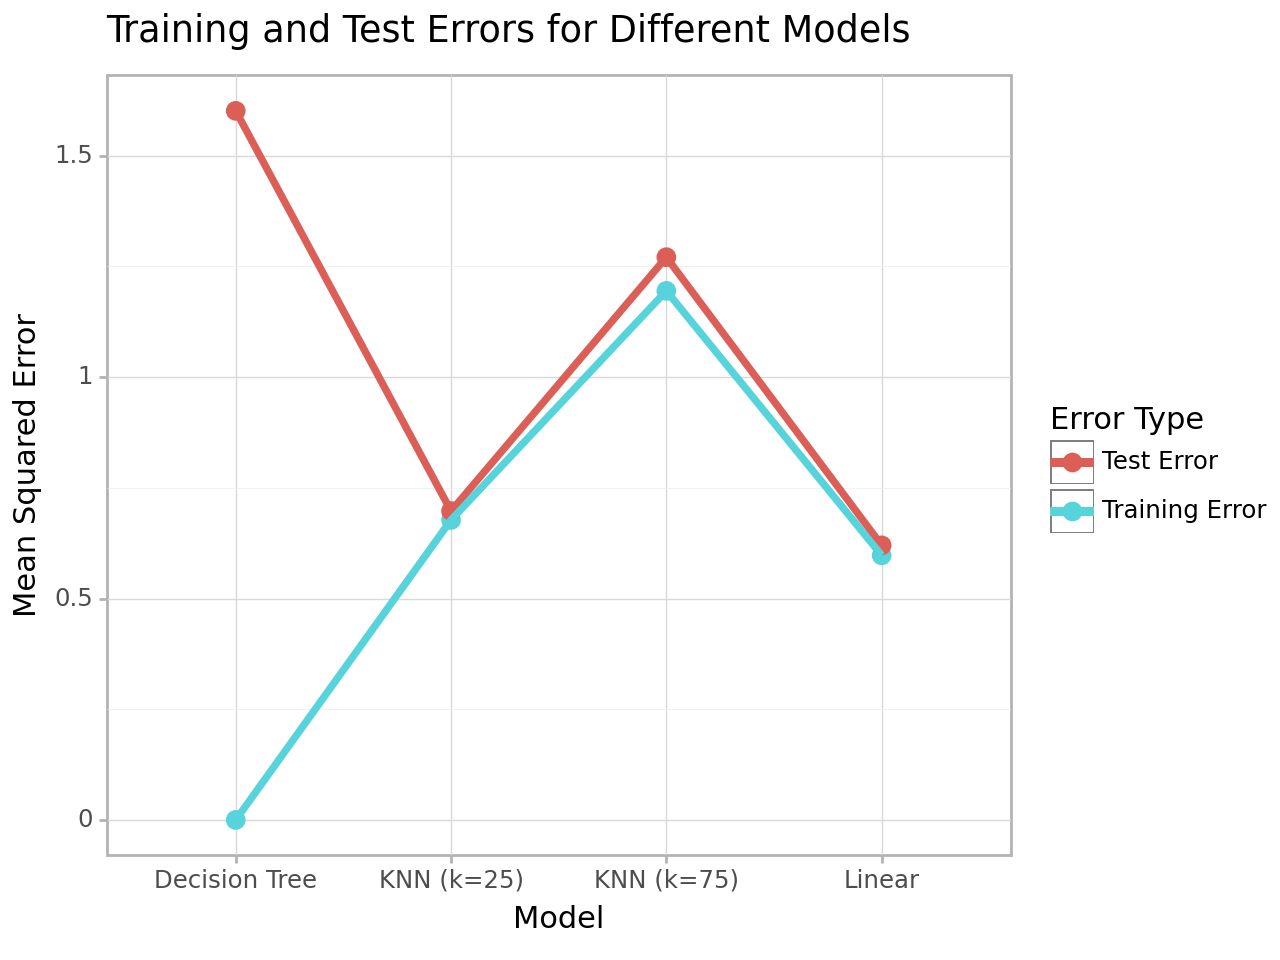

In [16]:
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_light

# Preparing the data for plotting
error_data = pd.DataFrame({
    'Model': pipeline_names * 2,
    'Error Type': ['Training Error'] * 4 + ['Test Error'] * 4, # Times 4 for the 4 models
    'Error': train_errors + test_errors
})

# Plotting
plot = (ggplot(error_data, aes(x='Model', y='Error', color='Error Type', group='Error Type')) +
        geom_point(size=3) +
        geom_line(size=1.5) +
        labs(title='Training and Test Errors for Different Models', y='Mean Squared Error') +
        theme_light()
       )

print(plot)

*    KNN k=25, the training and test MSE are very close together, and the test error is similar to the k=5 and k=10 models.
*    KNN k=75 model had significantly higher MSE for both training and test sets.
*    The Linear Model still has the lowest MSE and the smallest difference between training and testing sets.

Trying KNN k=1 and k=99, some extreme values for research

In [19]:
knn_pipeline_1 = Pipeline([
    ('transformer', ct),
    ('model', KNeighborsRegressor(n_neighbors=1))
])

knn_pipeline_2 = Pipeline([
    ('transformer', ct),
    ('model', KNeighborsRegressor(n_neighbors=99))
])

# Fitting and creating train test errors and predictions
pipelines = [lr_pipeline, knn_pipeline_1, knn_pipeline_2, dec_tree_pipeline]
pipeline_names = ['Linear', 'KNN (k=1)', 'KNN (k=99)', 'Decision Tree']
train_errors = []
test_errors = []

# Iterating over the pipelines
for pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    train_pred = pipeline.predict(X_train)
    test_pred = pipeline.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_pred))
    test_errors.append(mean_squared_error(y_test, test_pred))

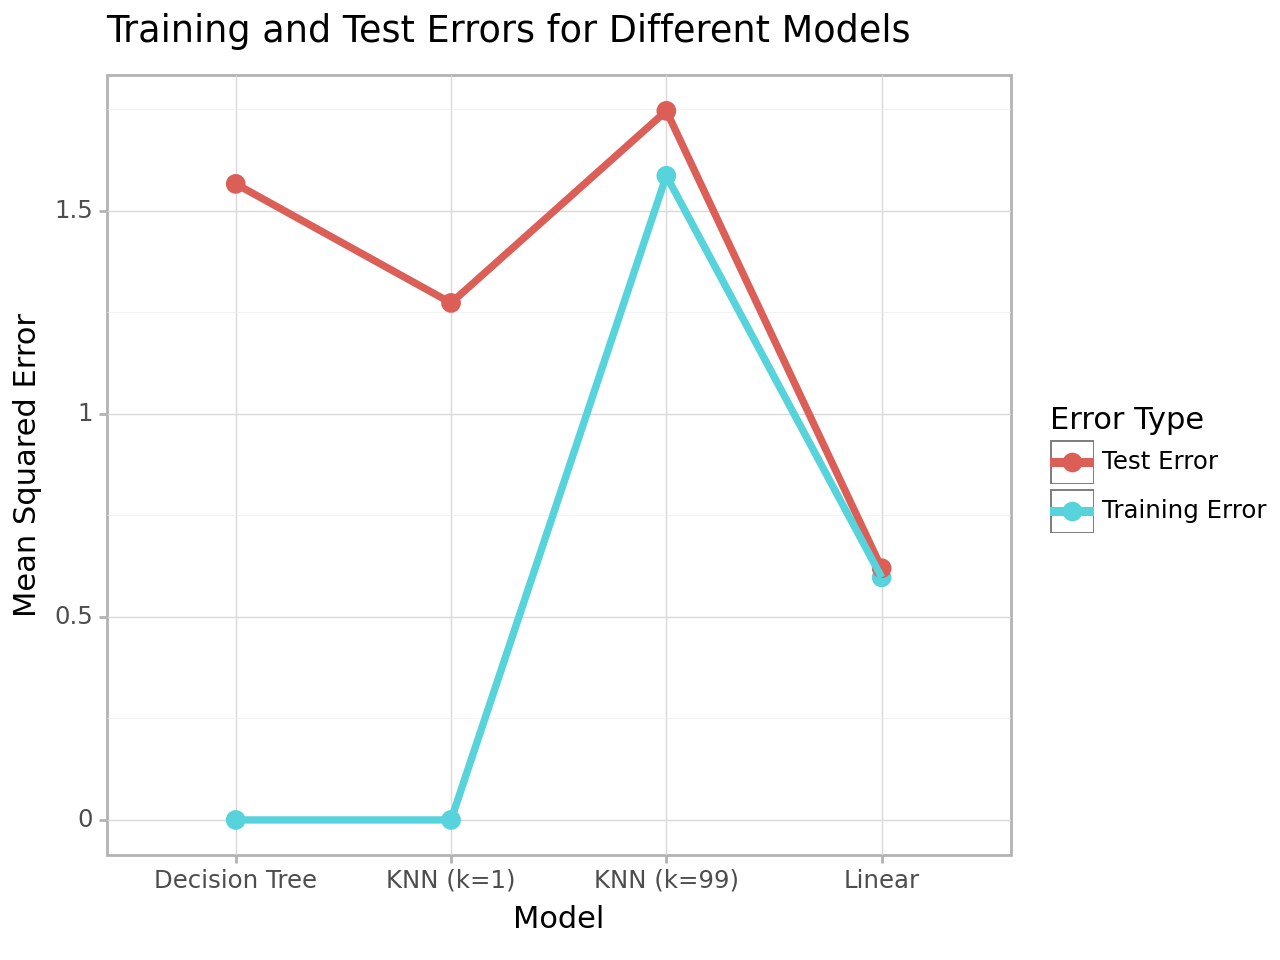

In [20]:
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_light

# Preparing the data for plotting
error_data = pd.DataFrame({
    'Model': pipeline_names * 2,
    'Error Type': ['Training Error'] * 4 + ['Test Error'] * 4, # Times 4 for the 4 models
    'Error': train_errors + test_errors
})

# Plotting
plot = (ggplot(error_data, aes(x='Model', y='Error', color='Error Type', group='Error Type')) +
        geom_point(size=3) +
        geom_line(size=1.5) +
        labs(title='Training and Test Errors for Different Models', y='Mean Squared Error') +
        theme_light()
       )

print(plot)

*    The KNN k=1 model seems to be overfitting on the training data, which resulted in a large gap with the test set. Visually, you can see that the k=1 model has little or no error, which is a result of overfitting.
*    The k=99 model has both training and test sets MSE increase again, and the gap between them also widened. Increasing the k-value has now introduced underfitting it seems.